# Needs-based reccomendation system
### Supervised Learning problem whcih accounts for knowledge of financial products and customers needs.

In [1]:
# imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# data loading and merging

clients = pd.read_excel('Needs.xlsx')
products = pd.read_excel('Products.xlsx')

clients['key'] = 1
products['key'] = 1
df = pd.merge(clients, products, on='key')
df.drop('key', axis=1, inplace=True)
clients.drop('key', axis=1, inplace=True)
products.drop('key', axis=1, inplace=True)
df

,ID,Age,Gender,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment,IDProduct,Type,Risk
0,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,1,1,0.55
1,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,2,0,0.30
2,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,3,0,0.12
3,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,4,0,0.44
4,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,5,1,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,7,1,0.75
54996,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,8,1,0.48
54997,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,9,1,0.27
54998,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,10,0,0.13


# Inferring labels from data
### A product is suggested to a client (flag = 1, 0 otherwise) if it satisfies the following conditions:
### 1. the income/accumulation propension of the client and the type of product match;
### 2. the synthetic risk indicator of the product is less than or equal to the risk propensity of the client.

In [3]:
# add the flag variable

df['flag'] = 0

for index, row in df.iterrows():
    if ((row['IncomeInvestment'] == 1 and row['Type'] == 0) or (row['AccumulationInvestment'] == 1 and row['Type'] == 1)) and row['RiskPropensity'] >= row['Risk']:
        df.at[index, 'flag'] = 1
        
df       

,ID,Age,Gender,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment,IDProduct,Type,Risk,flag
0,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,1,1,0.55,0
1,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,2,0,0.30,0
2,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,3,0,0.12,0
3,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,4,0,0.44,0
4,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1,5,1,0.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,7,1,0.75,0
54996,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,8,1,0.48,0
54997,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,9,1,0.27,1
54998,5000,67,1,3,0.383530,0.353167,34.324344,73.902960,1,1,10,0,0.13,1


# Logistic Regression
### Train set has 80% of the data, test set has 20% of the data.

In [4]:
# data split (train and test sets)

X = df.drop(['ID', 'IDProduct', 'flag'], axis=1)
y = df['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# model optimization (grid search for parameters)

param_grid = {'C': [0.005, 0.01, 0.015, 0.02, 0.025]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [6]:
# evaluation of the best model

y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Best Model Parameters: {best_params} \nBest Model Accuracy: {accuracy_best}")

Best Model Parameters: {'C': 0.015} 
Best Model Accuracy: 0.8949090909090909


In [7]:
# model training
model = LogisticRegression(C=0.015, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=0.015, max_iter=10000)

In [8]:
predicted_probabilities=model.predict_proba(X_test)
threshold = 10626/55000
y_pred2 = (predicted_probabilities[:, 1] >= threshold).astype(int)



In [9]:
# model evaluation

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

#con la threshold
print(classification_report(y_test, y_pred2))

Accuracy: 0.8949090909090909
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8845
           1       0.87      0.54      0.67      2155

    accuracy                           0.89     11000
   macro avg       0.88      0.76      0.80     11000
weighted avg       0.89      0.89      0.89     11000

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      8845
           1       0.49      0.85      0.62      2155

    accuracy                           0.80     11000
   macro avg       0.72      0.82      0.74     11000
weighted avg       0.86      0.80      0.82     11000



Dalla RECALL e dalla confusion matrix si nota che lo sbilanciamento del dataset influisce sulle performances, nonostante sembrino buone a giudicare dalla precision.
In particolare, circa il 50% delle volte (come il lancio di una moneta) un prodotto che sddisfa un cliente viene catalogato come non adatto.


Per risolvere questo potrebbe essere necessario
1) Campionare in distribuzioni (con dati bilanciati) per far vedere al modello qualtità simili di dati positivi e negativi
2) Alzare/abbassare la soglia di accettazione della Logistic Regression. (Usando magari la proporzione di flag = 1)
3) Cambiare modello

In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print((8672+1172)/11000)
print("Con soglia adattiva: ")
print(confusion_matrix(y_test, y_pred2))
print((6966+1830)/11000) # Perdiamo di bontà generale ma miglioriamo moltissimo la scelta nel caso di prodotto positivo

[[8672  173]
 [ 983 1172]]
0.8949090909090909
Con soglia adattiva: 
[[6966 1879]
 [ 325 1830]]
0.7996363636363636


# Clients evaluation

In [11]:
# model for clients suggestions

def suggestions(age, gender, family_members, financial_education, risk_propensity, income, wealth, income_investment, accumulation_investment):
    
        client = {'Age': [age],
                'Gender': [gender],
                'FamilyMembers': [family_members],
                'FinancialEducation': [financial_education],
                'RiskPropensity': [risk_propensity],
                'Income': [income],
                'Wealth': [wealth],
                'IncomeInvestment': [income_investment],
                'AccumulationInvestment': [accumulation_investment]}

        client = pd.DataFrame(client)

        client['key'] = 1
        products['key'] = 1
        data = pd.merge(client, products, on='key')
        data.drop('key', axis=1, inplace=True)
        client.drop('key', axis=1, inplace=True)
        products.drop('key', axis=1, inplace=True)

        s = model.predict(data.drop('IDProduct', axis=1))

        S = pd.DataFrame({'IDProduct': products['IDProduct'], 'flag': s})

        return S

In [12]:
# new client suggestion

age = 24
gender = 0
family_members = 4
financial_education = 0.8
risk_propensity = 0.45
income = 10
wealth = 3
income_investment = 0
accumulation_investment = 1

suggestions(age, gender, family_members, financial_education, risk_propensity, income, wealth, income_investment, accumulation_investment)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Income 


# Next steps
### Many other models could be performed; moreover, the following things could be improved:
### 1. the complete-dataframe creation (it makes all the following algorithms uselessly long);
### 2. the way flags are created (more features should be involved);
### 3. the logistic regression variables choice (transformations and possibly removals).

RANDOM FOREST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8845
           1       1.00      0.99      1.00      2155

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

[[8840    5]
 [  13 2142]]


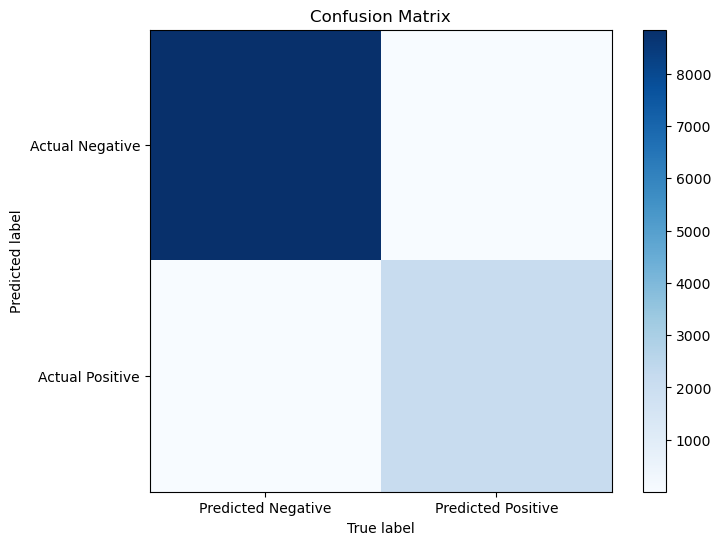

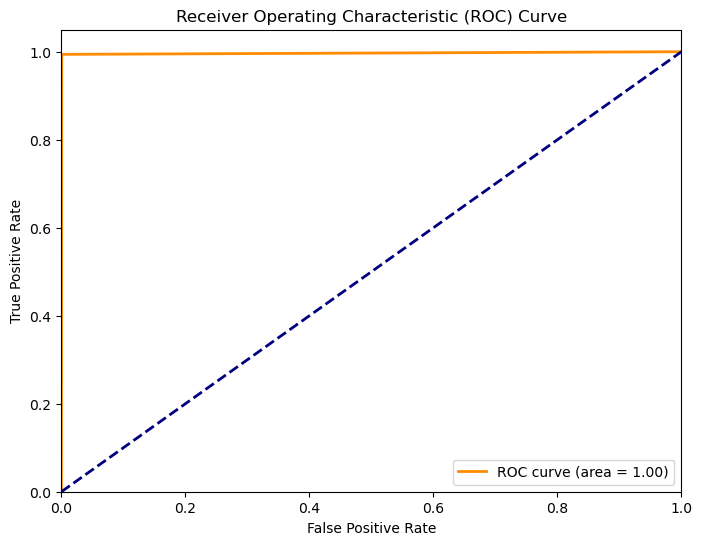

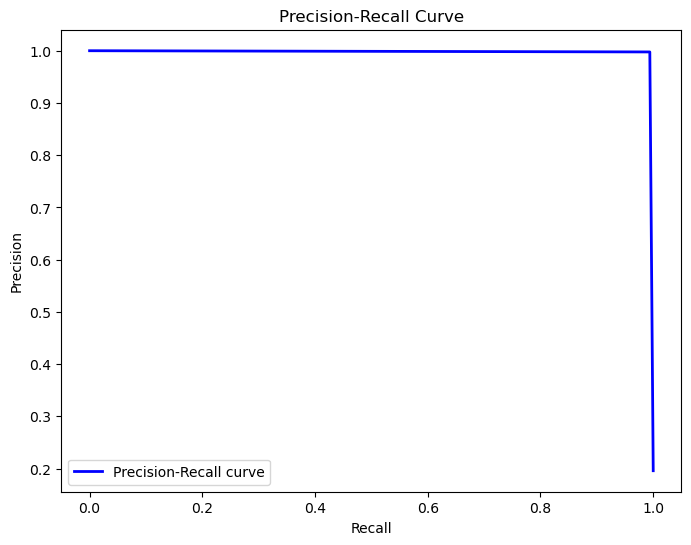

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming the necessary imports and data loading steps are already done

# data split (train and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# model evaluation
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
